## Import necessary Libraries

In [1]:
import ctypes
import numpy as np
import time
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
from IPython.display import display, HTML
import os

## Load DLL

> **NOTE:** Update the path here to include `opencv` and `CUDA 12.6` bin files!!

In [2]:
# Configure paths to required DLLs and libraries
# Update these paths based on your system setup
CUDA_PATH = r"C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.6\bin"  # Path to CUDA binaries
OPENCV_PATH = r"D:\dev\opencv\build\x64\vc16\bin"  # Path to OpenCV binaries
DLL_PATH = ".\x64\Debug\CombinedDLL.dll"  # Path to your DLL

os.add_dll_directory(CUDA_PATH)
os.add_dll_directory(OPENCV_PATH)

denoising_dll = ctypes.windll.LoadLibrary('./x64/Debug/CombinedDLL.dll')

## Setup all Functions

- This section is used to create python interface to call the functions in cpp

### CUDA

In [3]:
# CUDA functions
denoising_dll.cuda_dwt.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int
]
denoising_dll.cuda_dwt.restype = None

def cuda_dwt(input_image, n_channels, nIteration=1):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()
    
    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.cuda_dwt(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        nIteration
    )
    return output_data


denoising_dll.cuda_idwt.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int
]
denoising_dll.cuda_idwt.restype = None

def cuda_idwt(input_image, n_channels, nIteration=1):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()

    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.cuda_idwt(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        nIteration
    )
    return output_data


denoising_dll.cuda_bayesShrink.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int
]
denoising_dll.cuda_bayesShrink.restype = None

def cuda_bayesShrink(input_image, n_channels, level=1):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()

    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.cuda_bayesShrink(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols, n_channels,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        level
    )
    return output_data


denoising_dll.cuda_visuShrink.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int
]
denoising_dll.cuda_visuShrink.restype = None

def cuda_visuShrink(input_image, n_channels, level=1):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()

    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.cuda_visuShrink(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols, n_channels,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        level
    )
    return output_data


denoising_dll.cuda_neighShrink.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int
]
denoising_dll.cuda_neighShrink.restype = None

def cuda_neighShrink(input_image, n_channels, level=1, windowSize=3):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()

    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.cuda_neighShrink(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols, n_channels,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        level, windowSize
    )
    return output_data


denoising_dll.cuda_modiNeighShrink.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int
]
denoising_dll.cuda_modiNeighShrink.restype = None

def cuda_modiNeighShrink(input_image, n_channels, level=1, windowSize=3):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()

    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.cuda_modiNeighShrink(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols, n_channels,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        level, windowSize
    )
    return output_data

### OpenMP

In [4]:
# OpenMP functions

#OpenMP set number of threads to be used
denoising_dll.openmp_set_num_threads.argtypes = [
    ctypes.c_int
]
denoising_dll.openmp_set_num_threads.restype = None
def openmp_set_num_threads(num_threads):
    denoising_dll.openmp_set_num_threads(num_threads)

denoising_dll.openmp_get_num_threads.restype = ctypes.c_int
def openmp_get_num_threads():
    return denoising_dll.openmp_get_num_threads()


# OpenMP Discrete Wavelet Transform (DWT)
denoising_dll.openmp_dwt.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int
]
denoising_dll.openmp_dwt.restype = None

def openmp_dwt(input_image, n_channels, nIteration=1):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()
    
    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.openmp_dwt(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        nIteration
    )
    return output_data


# OpenMP Inverse Discrete Wavelet Transform (IDWT)
denoising_dll.openmp_idwt.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int
]
denoising_dll.openmp_idwt.restype = None

def openmp_idwt(input_image, n_channels, nIteration=1):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()

    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.openmp_idwt(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        nIteration
    )
    return output_data


# OpenMP Bayes Shrink
denoising_dll.openmp_bayesShrink.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int
]
denoising_dll.openmp_bayesShrink.restype = None

def openmp_bayesShrink(input_image, n_channels, level=1):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()

    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.openmp_bayesShrink(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols, n_channels,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        level
    )
    return output_data


# OpenMP Visual Shrink
denoising_dll.openmp_visuShrink.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int
]
denoising_dll.openmp_visuShrink.restype = None

def openmp_visuShrink(input_image, n_channels, level=1):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()

    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.openmp_visuShrink(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols, n_channels,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        level
    )
    return output_data


# OpenMP Neighbor Shrink
denoising_dll.openmp_neighShrink.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int
]
denoising_dll.openmp_neighShrink.restype = None

def openmp_neighShrink(input_image, n_channels, level=1, windowSize=3):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()

    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.openmp_neighShrink(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols, n_channels,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        level, windowSize
    )
    return output_data


# OpenMP Modified Neighbor Shrink
denoising_dll.openmp_modiNeighShrink.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int
]
denoising_dll.openmp_modiNeighShrink.restype = None

def openmp_modiNeighShrink(input_image, n_channels, level=1, windowSize=3):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()

    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.openmp_modiNeighShrink(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols, n_channels,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        level, windowSize
    )
    return output_data


### Sequential

In [5]:
# Sequential functions

# Sequential Discrete Wavelet Transform (DWT)
denoising_dll.sequential_dwt.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int
]
denoising_dll.sequential_dwt.restype = None

def sequential_dwt(input_image, n_channels, nIteration=1):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()
    
    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.sequential_dwt(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        nIteration
    )
    return output_data


# Sequential Inverse Discrete Wavelet Transform (IDWT)
denoising_dll.sequential_idwt.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int
]
denoising_dll.sequential_idwt.restype = None

def sequential_idwt(input_image, n_channels, nIteration=1):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()

    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.sequential_idwt(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        nIteration
    )
    return output_data


# Sequential Bayes Shrink
denoising_dll.sequential_bayesShrink.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int
]
denoising_dll.sequential_bayesShrink.restype = None

def sequential_bayesShrink(input_image, n_channels, level=1):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()

    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.sequential_bayesShrink(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols, n_channels,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        level
    )
    return output_data


# Sequential Visual Shrink
denoising_dll.sequential_visuShrink.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int
]
denoising_dll.sequential_visuShrink.restype = None

def sequential_visuShrink(input_image, n_channels, level=1):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()

    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.sequential_visuShrink(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols, n_channels,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        level
    )
    return output_data


# Sequential Neighbor Shrink
denoising_dll.sequential_neighShrink.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int
]
denoising_dll.sequential_neighShrink.restype = None

def sequential_neighShrink(input_image, n_channels, level=1, windowSize=3):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()

    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.sequential_neighShrink(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols, n_channels,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        level, windowSize
    )
    return output_data


# Sequential Modified Neighbor Shrink
denoising_dll.sequential_modiNeighShrink.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.c_int,
    ctypes.c_int
]
denoising_dll.sequential_modiNeighShrink.restype = None

def sequential_modiNeighShrink(input_image, n_channels, level=1, windowSize=3):
    rows, cols = input_image.shape[:2]
    input_data = input_image.astype(np.uint8)
    input_type = denoising_dll.CV_TYPE_8U()

    output_data = np.zeros_like(input_data, dtype=np.uint8)

    denoising_dll.sequential_modiNeighShrink(
        input_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        input_type, rows, cols, n_channels,
        output_data.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        level, windowSize
    )
    return output_data


### Other Helper function

In [6]:
# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, sigma=25):
    """
    Add Gaussian noise to an image.

    :param image: Input image (numpy array)
    :param mean: Mean of the Gaussian noise (default: 0)
    :param sigma: Standard deviation of the Gaussian noise (default: 25)
    :return: Noisy image (numpy array)
    """
    # Generate Gaussian noise
    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype('float32')

    # Add the noise to the image
    noisy_image = cv2.add(image.astype('float32'), gaussian_noise)

    # Clip values to stay within the valid range (0-255)
    noisy_image = np.clip(noisy_image, 0, 255).astype('uint8')

    return noisy_image

In [7]:
from time import perf_counter 

def measure_time(func, *args, **kwargs):
    """
    Measure the execution time of a function.
    
    :param func: The function to be timed.
    :param args: Arguments to pass to the function.
    :param kwargs: Keyword arguments to pass to the function.
    :return: The result of the function and the time taken for execution.
    """
    start_time = perf_counter()  # Capture the start time
    result = func(*args, **kwargs)  # Call the function with its arguments
    end_time = perf_counter()  # Capture the end time
    
    time_taken = end_time - start_time  # Calculate the time taken
        
    return result, time_taken  # Return both the result and the time taken


In [8]:
def run_and_measure(repeat, func, *args, **kwargs):
    """
    Run the function multiple times and compute the average execution time.
    The first Run will be excluded in calculation for more accurate result.
    
    :param func: The function to be measured.
    :param args: Arguments to pass to the function.
    :param kwargs: Keyword arguments to pass to the function.
    :return: Average execution time over 'repeat - 1' runs, The total execution time
    """
    sum = 0;
    for i in range(repeat):  # Run `repeat` times
        result, time_taken = measure_time(func, *args, **kwargs)
        
        # ignore the first run result as it might be slower
        if i == 1:
            continue
            
        sum += time_taken
    
    avg_time = sum / (repeat-1)
    return avg_time, sum

## Run

### Setting

> **NOTE:** Update the `image_paths` here

> To evaluate using 3 channel image (**BGR/RGB**) or 1 channel image (**Gray Scale**),
> - update imread in `imread = cv2.IMREAD_GRAYSCALE`
> - `cv2.IMREAD_GRAYSCALE` --> Read as 1 channels
> - `cv2.IMREAD_COLOR` --> Read as 3 channels


In [9]:
openmp_num_threads = 12
n_iterations = 3
repeat = 11
imread = cv2.IMREAD_COLOR

# Define your image paths for different sizes
image_paths = {
    "250": r"./Assets/fruits-250x250.jpg",
    "750": r"./Assets/fruits-750x750.jpg",
    "1250": r"./Assets/fruits-1250x1250.jpg",
    "1750": r"./Assets/fruits-1750x1750.jpg",
    "2250": r"./Assets/fruits-2250x2250.jpg",
    "2750": r"./Assets/fruits-2750x2750.jpg",
    "3250": r"./Assets/fruits-3250x3250.jpg",
    "3750": r"./Assets/fruits-3750x3750.jpg",
    "4250": r"./Assets/fruits-4250x4250.jpg",
    "5000": r"./Assets/fruits-5000x5000.jpg",
}

# List of algorithms
algos = [
    ("BayesShrink", sequential_bayesShrink, openmp_bayesShrink, cuda_bayesShrink),
    ("VisuShrink", sequential_visuShrink, openmp_visuShrink, cuda_visuShrink),
    ("NeighShrink", sequential_neighShrink, openmp_neighShrink, cuda_neighShrink),
    ("ModiNeighShrink", sequential_modiNeighShrink, openmp_modiNeighShrink, cuda_modiNeighShrink),
]

openmp_set_num_threads(openmp_num_threads)
print(f"Number of thread set : {openmp_get_num_threads()}")

Number of thread set : 12


### Test Run, ensure result is correct

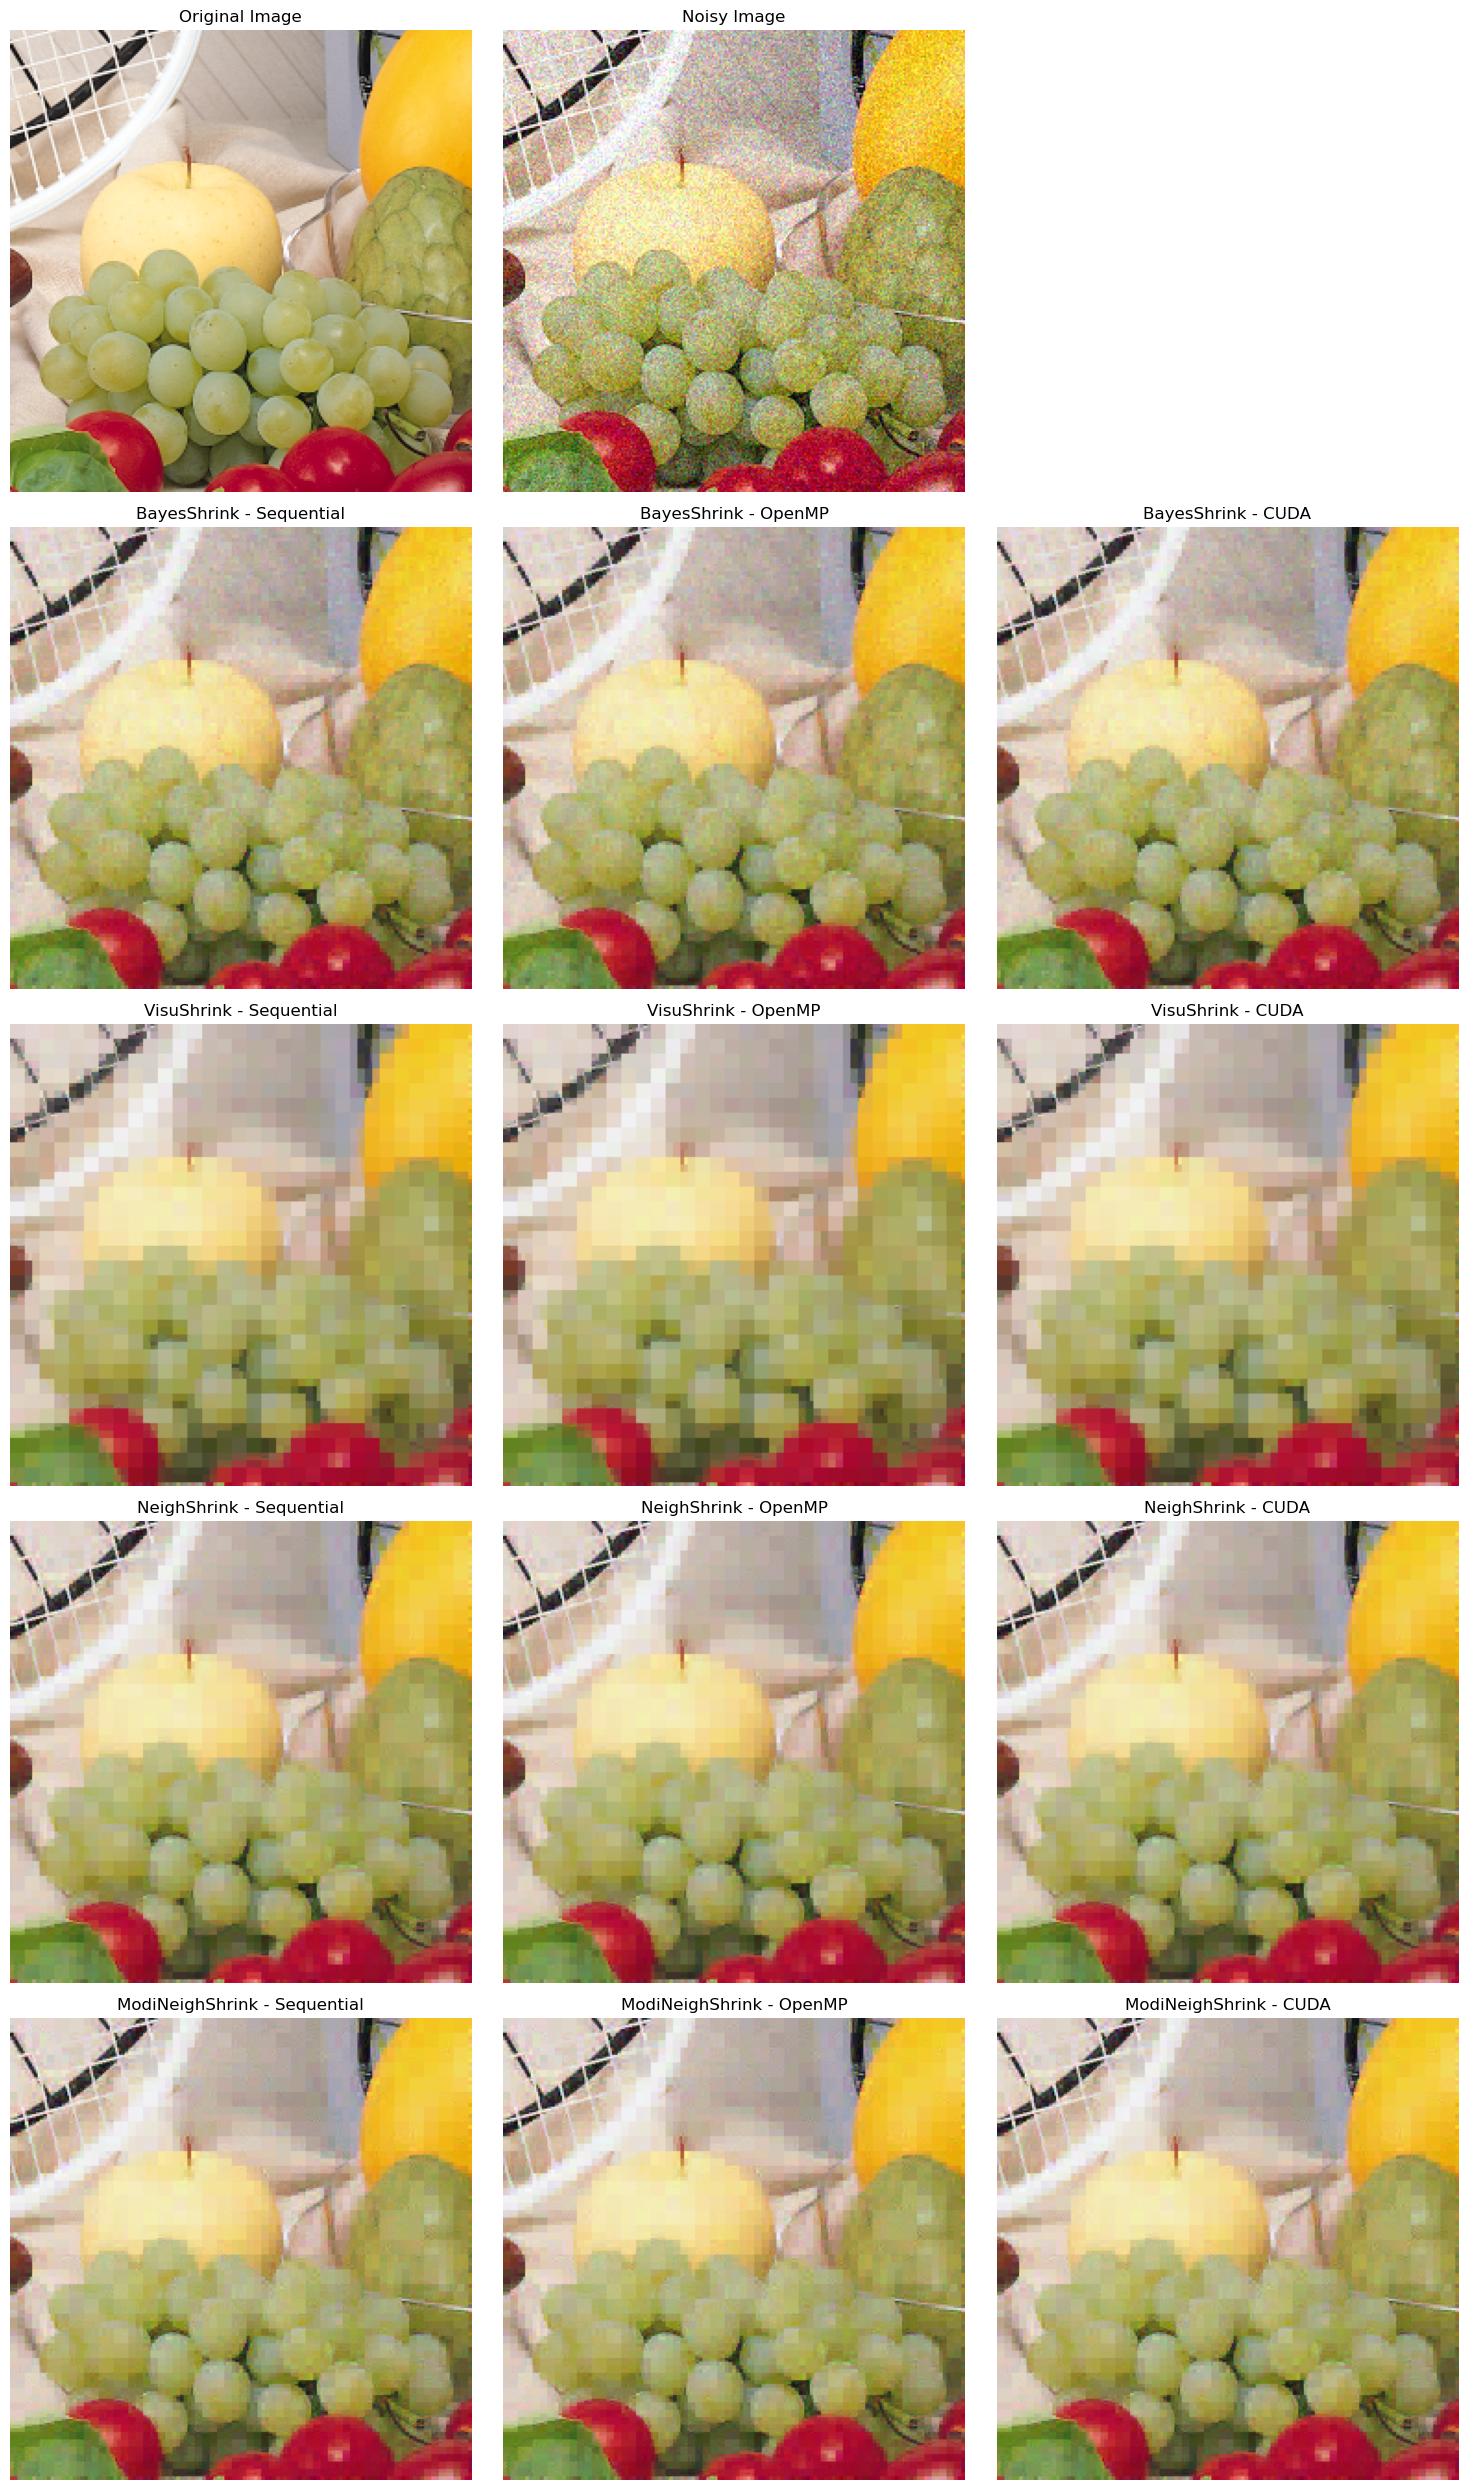

In [10]:
test_image = cv2.imread(r"./Assets/fruits-250x250.jpg", imread)

height, width = test_image.shape[:2]

# Ensure the dimensions are even
if height % 2 != 0 or width % 2 != 0:
    new_height = height if height % 2 == 0 else height - 1
    new_width = width if width % 2 == 0 else width - 1
    test_image = test_image[:new_height, :new_width]
    print(f"Adjusted image dimensions to even numbers: {new_width}x{new_height}")
        
noisy_test_image = add_gaussian_noise(test_image, mean=0, sigma=25)
n_channels = noisy_test_image.shape[2] if len(noisy_test_image.shape) >= 3 else 1

# Convert images to RGB for proper display
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
noisy_test_image_rgb = cv2.cvtColor(noisy_test_image, cv2.COLOR_BGR2RGB)

# Create a figure for plotting (1 additional row for test and noisy images)
fig, axes = plt.subplots(len(algos) + 1, 3, figsize=(15, 5 * (len(algos) + 1)))

# Plot the original and noisy images in the first row
axes[0, 0].imshow(test_image_rgb)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(noisy_test_image_rgb)
axes[0, 1].set_title("Noisy Image")
axes[0, 1].axis("off")

# Leave the third column in the first row empty
axes[0, 2].axis("off")

for row_idx, (algo_name, seq_func, openmp_func, cuda_func) in enumerate(algos, start=1):
    # Measure execution time for each platform
    seq_result = seq_func(noisy_test_image, n_channels, n_iterations)
    openmp_result = openmp_func(noisy_test_image, n_channels, n_iterations)
    cuda_result = cuda_func(noisy_test_image, n_channels, n_iterations)
    
    seq_result = cv2.cvtColor(seq_result, cv2.COLOR_BGR2RGB)
    openmp_result = cv2.cvtColor(openmp_result, cv2.COLOR_BGR2RGB)
    cuda_result = cv2.cvtColor(cuda_result, cv2.COLOR_BGR2RGB)

    # Plot the results
    results = [seq_result, openmp_result, cuda_result]
    titles = [f"{algo_name} - Sequential", f"{algo_name} - OpenMP", f"{algo_name} - CUDA"]

    for col_idx, (result, title) in enumerate(zip(results, titles)):
        ax = axes[row_idx][col_idx]
        ax.imshow(result, cmap="gray")
        ax.set_title(title)
        ax.axis("off")
        
# Adjust layout and show the plot
plt.tight_layout()
plt.show()    

### Start Evaluate Performance

In [11]:
# Initialize the execution_times dictionary to store times for each algorithm and each image
execution_times = {algo[0]: {"Sequential": [], "OpenMP": [], "CUDA": []} for algo in algos}

# Iterate over the image paths (i.e., image sizes)
for image_size, path in image_paths.items():
    input_image = cv2.imread(path, imread)
    
    if input_image is None:
        print(f"Error: Could not load the image at {path}.")
        continue

    print(f"Evaluating for Image dimension : {image_size}x{image_size}!")
    
    height, width = input_image.shape[:2]

    # Ensure the dimensions are even
    if height % 2 != 0 or width % 2 != 0:
        new_height = height if height % 2 == 0 else height - 1
        new_width = width if width % 2 == 0 else width - 1
        input_image = input_image[:new_height, :new_width]
        print(f"Adjusted image dimensions to even numbers: {new_width}x{new_height}")
        
    # Add Gaussian noise to the image
    noisy_image = add_gaussian_noise(input_image, mean=0, sigma=25)

    # Number of channels in the image
    n_channels = noisy_image.shape[2] if len(noisy_image.shape) >= 3 else 1

    # Measure the execution time for each algorithm on different platforms
    for algo_name, seq_func, openmp_func, cuda_func in algos:
        # Measure execution time for each platform
        seq_time = run_and_measure(repeat, seq_func, noisy_image, n_channels, n_iterations)[0]
        openmp_time = run_and_measure(repeat, openmp_func, noisy_image, n_channels, n_iterations)[0]
        cuda_time = run_and_measure(repeat, cuda_func, noisy_image, n_channels, n_iterations)[0]
        
        # Append the execution times for the current image and platform
        execution_times[algo_name]["Sequential"].append(seq_time)
        execution_times[algo_name]["OpenMP"].append(openmp_time)
        execution_times[algo_name]["CUDA"].append(cuda_time)

Evaluating for Image dimension : 250x250!
Evaluating for Image dimension : 750x750!
Evaluating for Image dimension : 1250x1250!
Evaluating for Image dimension : 1750x1750!
Evaluating for Image dimension : 2250x2250!
Evaluating for Image dimension : 2750x2750!
Evaluating for Image dimension : 3250x3250!
Evaluating for Image dimension : 3750x3750!
Evaluating for Image dimension : 4250x4250!
Evaluating for Image dimension : 5000x5000!


## Plot Results

### Average time vs Image size

C:\Users\zhike\AppData\Local\Temp\ipykernel_28152\4277519809.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


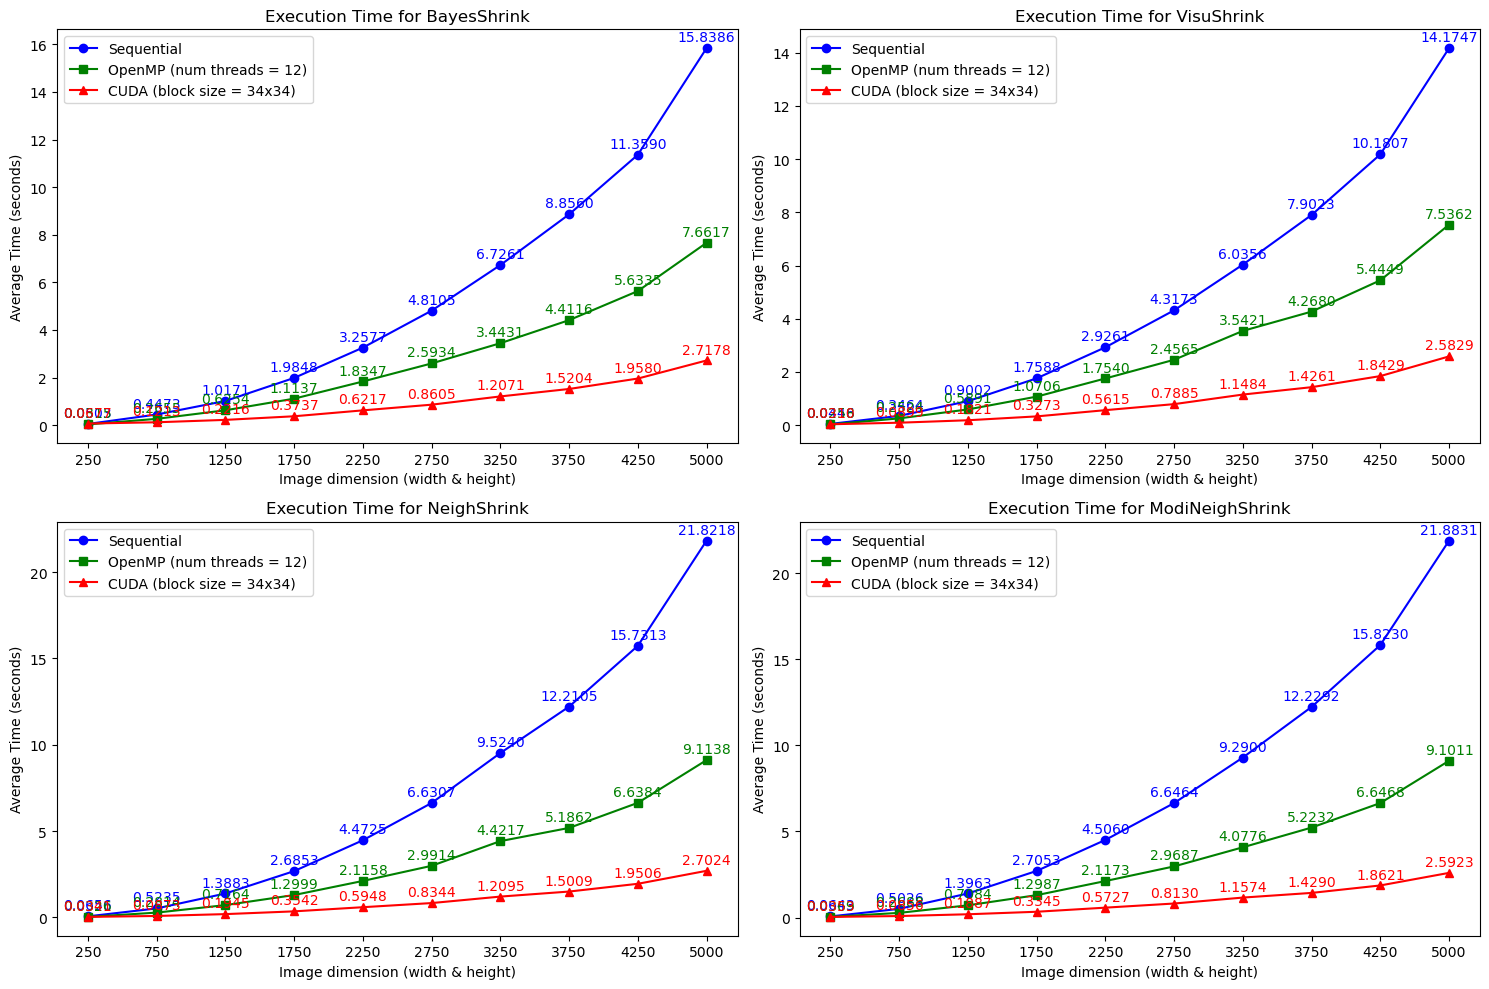

In [12]:
# Plotting code for average time vs image size
plt.figure(figsize=(15, 10))

# Plot data for each algorithm
for i, (algo_name, times) in enumerate(execution_times.items()):
    plt.subplot(2, 2, i + 1)  # Create a subplot for each algorithm
    
    # Image size (the x-axis)
    image_sizes_for_plot = list(image_paths.keys())
    
    # Get the execution times for each platform
    seq_times = times["Sequential"]
    openmp_times = times["OpenMP"]
    cuda_times = times["CUDA"]
    
    # Plot execution time vs image size
    plt.plot(image_sizes_for_plot, seq_times, marker='o', label='Sequential', color='b')
    plt.plot(image_sizes_for_plot, openmp_times, marker='s', label='OpenMP (num threads = 12)', color='g')
    plt.plot(image_sizes_for_plot, cuda_times, marker='^', label='CUDA (block size = 34x34)', color='r')
    
    # Annotate each point with the execution time
    for j, time in enumerate(seq_times):
        plt.annotate(f"{time:.4f}", (image_sizes_for_plot[j], seq_times[j]), 
                     textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='blue')
    for j, time in enumerate(openmp_times):
        plt.annotate(f"{time:.4f}", (image_sizes_for_plot[j], openmp_times[j]), 
                     textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='green')
    for j, time in enumerate(cuda_times):
        plt.annotate(f"{time:.4f}", (image_sizes_for_plot[j], cuda_times[j]), 
                     textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='red')
    
    # Customize graph labels and title
    plt.xlabel('Image dimension (width & height)')
    plt.ylabel('Average Time (seconds)')
    plt.title(f'Execution Time for {algo_name}')
    plt.legend()
    plt.tight_layout()

# Show the graphs
plt.show()

### Performance Gained

C:\Users\zhike\AppData\Local\Temp\ipykernel_28152\3435530502.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


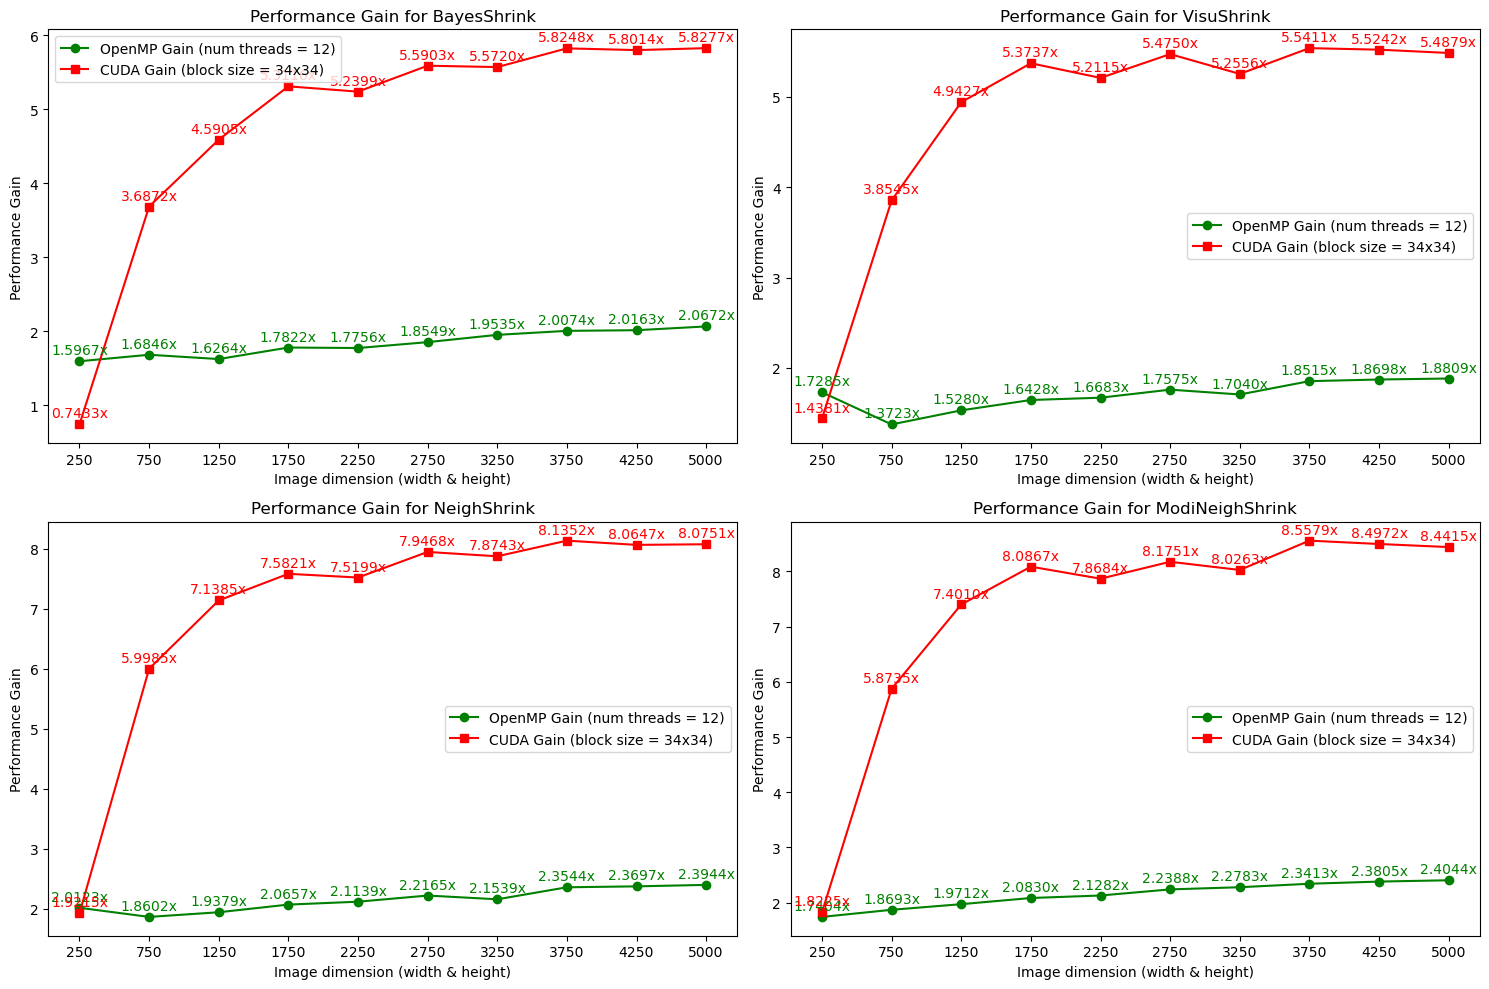

In [13]:
# Compute performance gain and plot
plt.figure(figsize=(15, 10))

for i, (algo_name, times) in enumerate(execution_times.items()):
    plt.subplot(2, 2, i + 1)
    
    image_sizes_for_plot = list(image_paths.keys())
    seq_times = times["Sequential"]
    openmp_times = times["OpenMP"]
    cuda_times = times["CUDA"]
    
    # Compute performance gains
    openmp_gains = [seq / omp for seq, omp in zip(seq_times, openmp_times)]
    cuda_gains = [seq / cud for seq, cud in zip(seq_times, cuda_times)]
    
    # Plot performance gains
    plt.plot(image_sizes_for_plot, openmp_gains, marker='o', label='OpenMP Gain (num threads = 12)', color='g')
    plt.plot(image_sizes_for_plot, cuda_gains, marker='s', label='CUDA Gain (block size = 34x34)', color='r')
    
    # Annotate each point with the performance gain
    for j, gain in enumerate(openmp_gains):
        plt.annotate(f"{gain:.4f}x", (image_sizes_for_plot[j], openmp_gains[j]),
                     textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='green')
    for j, gain in enumerate(cuda_gains):
        plt.annotate(f"{gain:.4f}x", (image_sizes_for_plot[j], cuda_gains[j]),
                     textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='red')
    
    # Customize labels and title
    plt.xlabel('Image dimension (width & height)')
    plt.ylabel('Performance Gain')
    plt.title(f'Performance Gain for {algo_name}')
    plt.legend()
    plt.tight_layout()

plt.show()

### Summary Table

In [14]:
# Initialize the summary data
summary_data = []

# Populate the summary data
for algo_name, timings in execution_times.items():
    seq_times = timings["Sequential"]
    omp_times = timings["OpenMP"]
    cuda_times = timings["CUDA"]
    
    for img_size, seq_time, omp_time, cuda_time in zip(image_paths.keys(), seq_times, omp_times, cuda_times):
        openmp_gain = seq_time / omp_time if omp_time > 0 else 0
        cuda_gain = seq_time / cuda_time if cuda_time > 0 else 0
        summary_data.append([algo_name, img_size, seq_time, omp_time, cuda_time, openmp_gain, cuda_gain])

# Create the DataFrame with proper columns
columns = [
    'Algorithm', 'Image Size (pixels)', 'Sequential Time (s)', 
    'OpenMP Time (s)', 'CUDA Time (s)', 'OpenMP Gain', 'CUDA Gain'
]
summary_df = pd.DataFrame(summary_data, columns=columns)

# Define custom highlighting functions
def highlight_min_execution(s):
    """Highlight the minimum execution time in each row."""
    is_min = s == s.min()
    return ['background-color: #00ff0050' if v else '' for v in is_min]

def highlight_max_gain(s):
    """Highlight the maximum performance gain in each row."""
    is_max = s == s.max()
    return ['background-color: #add8e650' if v else '' for v in is_max]

# Apply the custom highlighting functions
styled_table = (
    summary_df.style
    .apply(highlight_min_execution, subset=['Sequential Time (s)', 'OpenMP Time (s)', 'CUDA Time (s)'], axis=1)
    .apply(highlight_max_gain, subset=['OpenMP Gain', 'CUDA Gain'], axis=1)
    .format({
        'Sequential Time (s)': '{:.4f}', 
        'OpenMP Time (s)': '{:.4f}', 
        'CUDA Time (s)': '{:.4f}', 
        'OpenMP Gain': '{:.4f}x', 
        'CUDA Gain': '{:.4f}x'
    })  # Format the numbers
    .set_table_styles([  # Add table effects
        {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-size', '14px')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#ddd')]}
    ])
    .set_caption('<h2 style="text-align: center; margin-bottom: 20px;">Performance Comparison Summary Table</h1>')
)

# Display the styled table
display(styled_table)


,Algorithm,Image Size (pixels),Sequential Time (s),OpenMP Time (s),CUDA Time (s),OpenMP Gain,CUDA Gain
0,BayesShrink,250,0.0503,0.0315,0.0677,1.5967x,0.7433x
1,BayesShrink,750,0.4473,0.2655,0.1213,1.6846x,3.6872x
2,BayesShrink,1250,1.0171,0.6254,0.2216,1.6264x,4.5905x
3,BayesShrink,1750,1.9848,1.1137,0.3737,1.7822x,5.3116x
4,BayesShrink,2250,3.2577,1.8347,0.6217,1.7756x,5.2399x
5,BayesShrink,2750,4.8105,2.5934,0.8605,1.8549x,5.5903x
6,BayesShrink,3250,6.7261,3.4431,1.2071,1.9535x,5.5720x
7,BayesShrink,3750,8.8560,4.4116,1.5204,2.0074x,5.8248x
8,BayesShrink,4250,11.3590,5.6335,1.9580,2.0163x,5.8014x
9,BayesShrink,5000,15.8386,7.6617,2.7178,2.0672x,5.8277x
